# Project
# Food Image Classification

## 1. EDA

### 1.1 REquirements

In [1]:
!pip install opencv-python

In [2]:
!pip install tensorflow

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import pickle
import glob
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D,Flatten,Dropout,GlobalAveragePooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

### 1.2 Loading local indian food images dataset

In [8]:
image_dict = {}
# Define the list of file names
from pathlib import Path
from tqdm import tqdm
file_names = []
labels = []
directory = r'D:\Dhiren\NJIT\Machine Learning\Project\archive\Indian Food Images'

# Verify the directory exists
if not Path(directory).exists():
    print(f"The directory '{directory}' does not exist.")
else:
    for file in sorted((Path(directory).glob('*/*.jpg'))):
        file_names.append(str(file))
        label = str(file).split('\\')[-2]  # Corrected the line
        labels.append(label)
    print(len(file_names), len(labels))
    if file_names and labels:
        print(file_names[0], labels[0])
    else:
        print("No files found in the specified directory.")


0 0
No files found in the specified directory.


In [15]:
from pathlib import Path
from tqdm import tqdm

image_dict = {}
base_dir = Path(r'D:\Dhiren\NJIT\Machine Learning\Project\archive\Indian Food Images')
file_names = []
labels = []

# Iterate through each subdirectory
for sub_dir in tqdm(base_dir.iterdir(), desc="Processing directories"):
    if sub_dir.is_dir():
        label = sub_dir.name  # Directory name is the label
        for file in sub_dir.glob('*.jpg'):
            file_names.append(str(file))
            labels.append(label)

print("Number of files:", len(file_names))
print("Number of labels:", len(labels))
print("First file name and label:", file_names[0], labels[0])


Processing directories: 1it [00:00, ?it/s]

Number of files: 0
Number of labels: 0


IndexError: list index out of range

#### 1.3 Visualizing the image and its lables to know that the dataset was succesfully loaded

In [5]:
# file_names[0]
# image = cv2.imread(file_names[0])
# cv2.imshow('Image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

image = Image.open(file_names[0])
display(image)
print(labels[0])

IndexError: list index out of range

#### 1.4 Creating a dataframe of the imported dataset

In [ ]:
df = pd.DataFrame({'Image':file_names, 'Label':labels})
df

Image       Label
0     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam
1     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam
2     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam
3     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam
4     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam
...                                                 ...         ...
3995  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam
3996  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam
3997  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam
3998  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam
3999  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam

[4000 rows x 2 columns]

#### 1.5 Looking for missing values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   4000 non-null   object
 1   Label   4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


Here we have checked that there are no null values in the dataset.

In [ ]:
df.Label.value_counts()

Label
adhirasam               50
aloo_gobi               50
naan                    50
mysore_pak              50
modak                   50
                        ..
daal_puri               50
daal_baati_churma       50
chikki                  50
chicken_tikka_masala    50
unni_appam              50
Name: count, Length: 80, dtype: int64

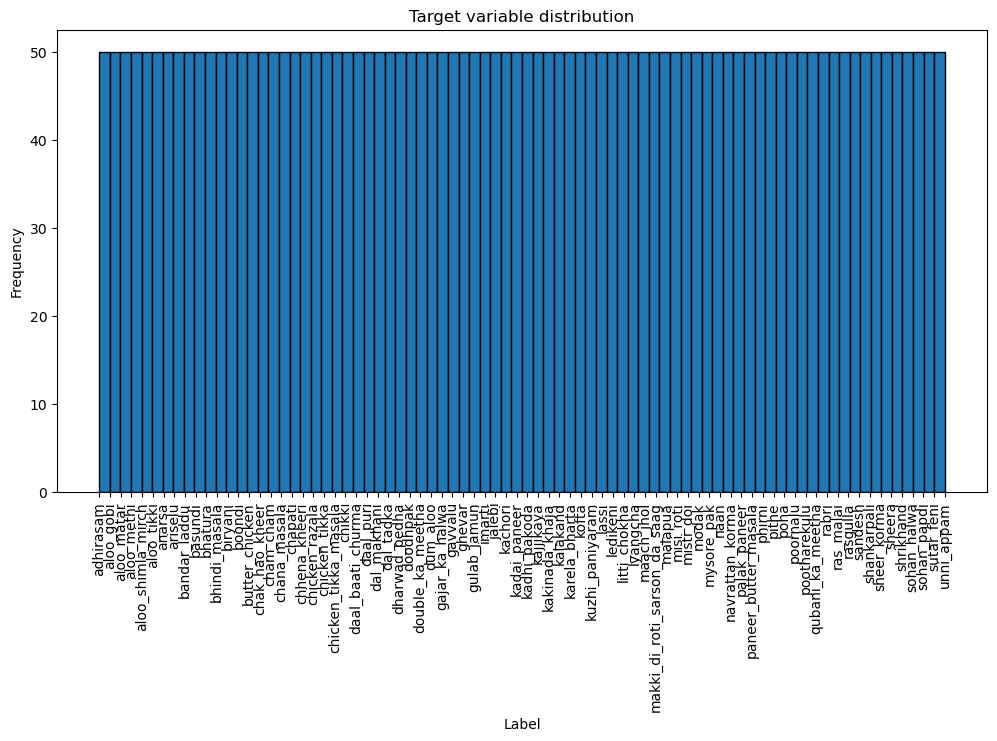

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
data = df['Label']
# colors = plt.cm.viridis(np.linspace(0, 1, 20))
# Plotting the histogram using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the size as needed
plt.hist(data, bins=80, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Target variable distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

- Here we can clearly see that the data is evenly distributed with all the target variables having equal representation of 50 images each.
- Here as the target and input are one to one matched we can infer that the input variable distribution is also the same.


#### 1.6 Correlation of features

- Here as we have only one feature that is the image, there is no question of finding a correlation matrix.
- Also as there is only one feature there is one to one relation between the feature(image) and target(label) there cannot exist any meaningful correlation matrix.

#### 1.7 Understanding the dataset

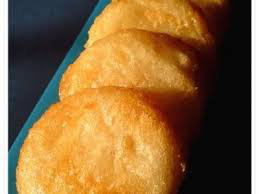

adhirasam


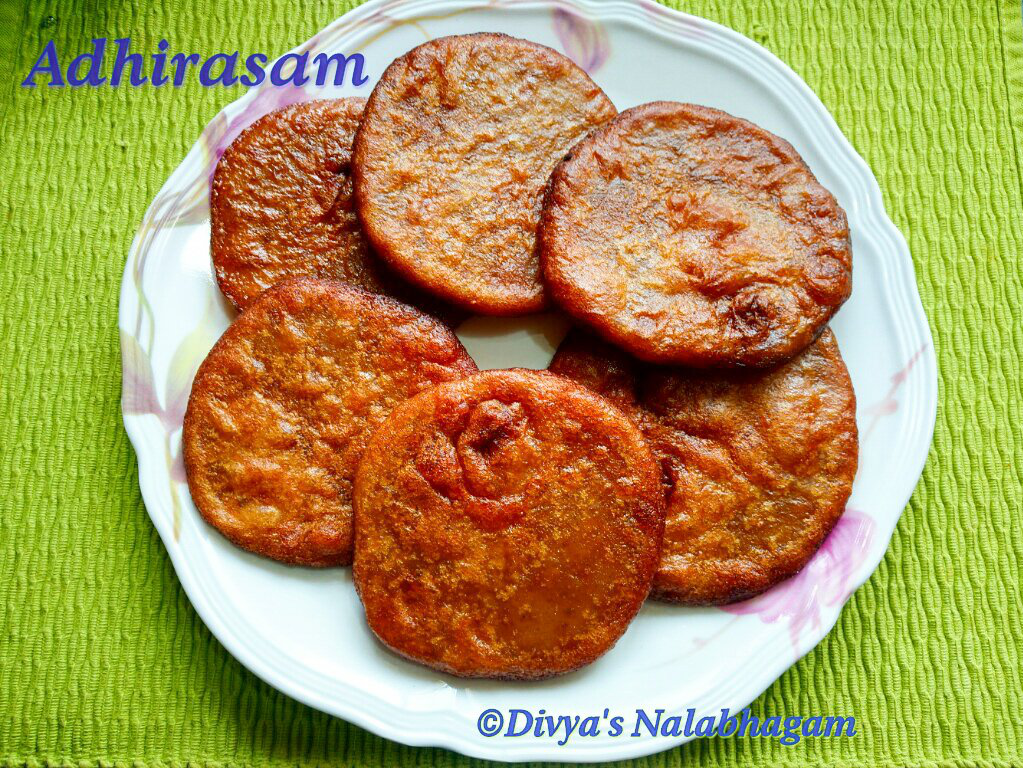

adhirasam


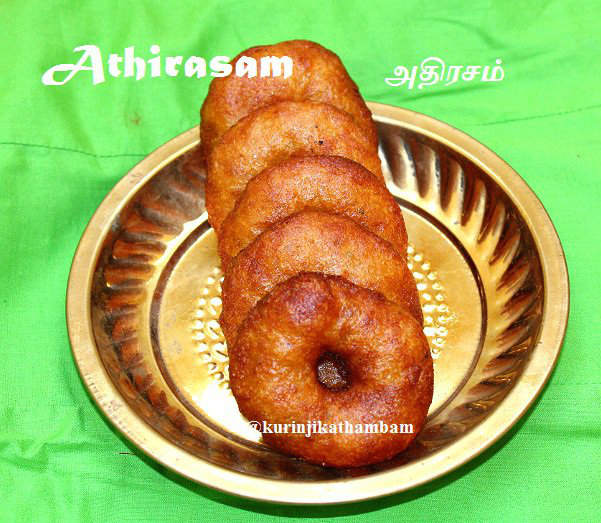

adhirasam


In [ ]:
for i in range(3):
    image = Image.open(file_names[i])
    display(image)
    print(labels[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   4000 non-null   object
 1   Label   4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [ ]:
df.describe()

Image      Label
count                                                4000       4000
unique                                               4000         80
top     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  adhirasam
freq                                                    1         50

#### 1.8 Feature transformation

In [ ]:
df['Label_encoded'] = LabelEncoder().fit_transform(df['Label'])
df['Label_encoded'].value_counts()

Label_encoded
0     50
1     50
58    50
57    50
56    50
      ..
25    50
24    50
23    50
22    50
79    50
Name: count, Length: 80, dtype: int64

In [ ]:
df

Image       Label  \
0     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam   
1     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam   
2     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam   
3     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam   
4     C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...   adhirasam   
...                                                 ...         ...   
3995  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam   
3996  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam   
3997  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam   
3998  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam   
3999  C:\Users\rohan\Downloads\All_NJIT\NJIT_Course\...  unni_appam   

      Label_encoded  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
3995             79  
3996             79  
3997             79  
3998             79  
3999             79  

[4000 rows x 3 columns]

- Here we perform label encoding as we are dealing with categorical data.
- As we are performing this operation over target variable we use label encoding.

### 2. Building multiple models

#### 2.1 Train test split

In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.30, shuffle = True, random_state = 42)

- Here we are using tenserflow preprocessing function where we rescale all the images to bring the pixel values between 0 and 1.
- We also carve out a 20% validation split from the traning dataset.

In [ ]:
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                           validation_split = 0.2)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

- Here we are using flow_from_dataframe method from the ImageDataGenerator to generate data batches for training, validation, and testing.
- We are also specifying target size(The dimensions to which all images will be resized), color_mode(The color mode of the images using 'rgb') and class_mode(The type of labels; here, it's set to 'categorical' for multi-class classification) as well as seed(Random seed for shuffling and transformations).

In [ ]:
train_image = train_gen.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Image',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = True,
                                           seed = 42,
                                           subset = 'training')
val_image = train_gen.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Image',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = True,
                                           seed = 42,
                                           subset = 'validation')
test_image = test_gen.flow_from_dataframe(dataframe = test_df,
                                           x_col = 'Image',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = False)

Found 2240 validated image filenames belonging to 80 classes.
Found 560 validated image filenames belonging to 80 classes.
Found 1200 validated image filenames belonging to 80 classes.


#### 2.2 Building a vanilla CNN model with minimum hyper-parameter tuning.

- This code sets up a convolutional neural network (CNN) for a regression task using TensorFlow's Keras API.

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters = 16, kernel_size =(3,3), activation = 'relu' )(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu' )(x)
x = GlobalAveragePooling2D()(x)
#x = tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu' )(x)
x = Dense(512, activation='relu')(x)  # Add more units based on your requirements
x = Dense(256, activation='relu')(x)  # Add more units based on your requirements
x = Dense(128, activation='relu')(x) 
outputs = Dense(80, activation='softmax')(x)  # Use softmax for multi-class classification

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = model.fit(train_image, validation_data = val_image, epochs = 3)

Epoch 1/3


C:\Users\rohan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 49s 601ms/step - accuracy: 0.0155 - loss: 4.3846 - val_accuracy: 0.0089 - val_loss: 4.3824
Epoch 2/3
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 535ms/step - accuracy: 0.0178 - loss: 4.3755 - val_accuracy: 0.0161 - val_loss: 4.3333
Epoch 3/3
70/70 ━━━━━━━━━━━━━━━━━━━━ 41s 547ms/step - accuracy: 0.0216 - loss: 4.2926 - val_accuracy: 0.0357 - val_loss: 4.2493


In [ ]:
model.evaluate(test_image)

38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 464ms/step - accuracy: 0.0208 - loss: 4.2348


[4.2527289390563965, 0.019999999552965164]

### Training vs Validation Accuraccy

Text(0.5, 1.0, 'Training and Validation Accuracy')

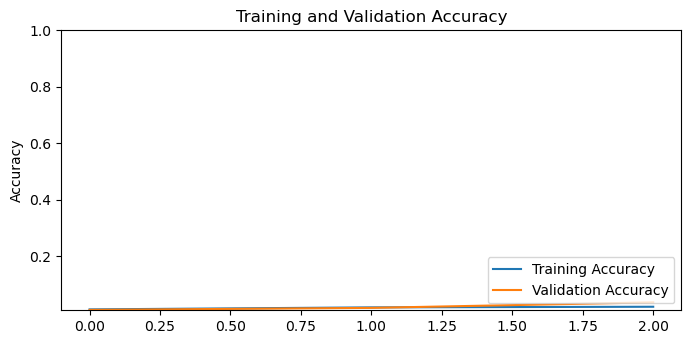

In [ ]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)
# plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
# plt.legend(loc='lower right')
# plt.ylabel('Loss')
# plt.ylim([min(plt.ylim()),1])
# plt.title('Training and Validation Loss Curve')

In [ ]:
inputs = tf.keras.Input(shape = (224,224,3))
x = tf.keras.layers.Conv2D(filters = 16, kernel_size =(3,3), activation = 'relu' )(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu' )(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'linear')(x)
model_kaggle = tf.keras.Model(inputs = inputs, outputs = outputs)
model_kaggle.compile(optimizer = 'adam',
             loss = 'mse',
             metrics = ['accuracy'])
history_kaggle  = model_kaggle.fit(train_image,
                    validation_data = val_image,
                    epochs = 3,
                    callbacks = [tf.keras.callbacks.EarlyStopping(
                    monitor = 'val_loss',
                    patience = 5,
                    restore_best_weights = True)])

Epoch 1/3
70/70 ━━━━━━━━━━━━━━━━━━━━ 49s 619ms/step - accuracy: 0.9875 - loss: 0.0136 - val_accuracy: 0.9875 - val_loss: 0.0123
Epoch 2/3
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 574ms/step - accuracy: 0.9875 - loss: 0.0123 - val_accuracy: 0.9875 - val_loss: 0.0123
Epoch 3/3
70/70 ━━━━━━━━━━━━━━━━━━━━ 43s 573ms/step - accuracy: 0.9875 - loss: 0.0123 - val_accuracy: 0.9875 - val_loss: 0.0123


# Model 2 with Image augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,validation_split = 0.2,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,validation_split = 0.2)
# Create ImageDataGenerator test instance without data augmentation
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

In [ ]:
train_image_augmented = train_datagen_augmented.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Image',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = False,
                                           seed = 42,
                                           subset = 'training')

train_image_original = train_datagen.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Image',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = False,
                                           seed = 42,
                                           subset = 'training')

val_image_augmented = train_datagen_augmented.flow_from_dataframe(dataframe = train_df,
                                           x_col = 'Image',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = False,
                                           seed = 42,
                                           subset = 'validation')
test_image = test_gen.flow_from_dataframe(dataframe = test_df,
                                           x_col = 'Image',
                                           y_col = 'Label',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           color_mode = 'rgb',
                                           class_mode = 'categorical',
                                           shuffle = False)

Found 2240 validated image filenames belonging to 80 classes.
Found 2240 validated image filenames belonging to 80 classes.
Found 560 validated image filenames belonging to 80 classes.
Found 1200 validated image filenames belonging to 80 classes.


In [ ]:
# Extract images and labels from train_image_augmented
original_images, original_labels = next(train_image_original)
augmented_images, augmented_labels = next(train_image_augmented)

In [ ]:
len(batch_labels),len(batch_images)

(32, 32)

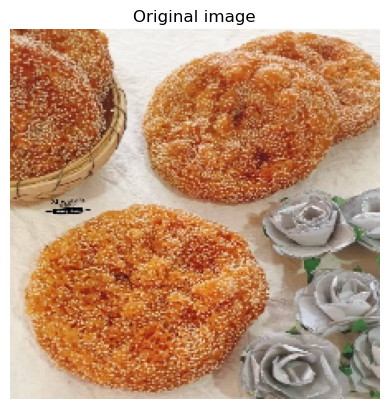

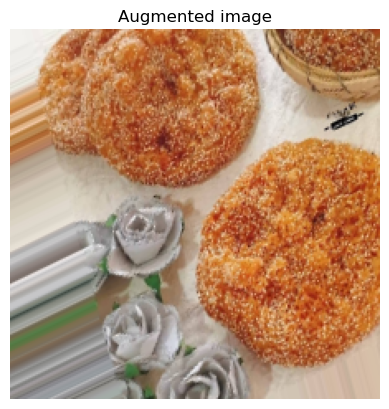

In [ ]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(original_images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

# 2.3 Building a CNN model with Agumented data and hyper-parameter tuning.



In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters = 16, kernel_size =(3,3), activation = 'relu' )(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu' )(x)
x = GlobalAveragePooling2D()(x)
#x = tf.keras.layers.Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu' )(x)
x = Dense(512, activation='relu')(x)  # Add more units based on your requirements
x = Dense(256, activation='relu')(x)  # Add more units based on your requirements
x = Dense(128, activation='relu')(x) 
outputs = Dense(80, activation='softmax')(x)  # Use softmax for multi-class classification

# Create the final model
model_agumented = tf.keras.Model(inputs=inputs, outputs=outputs)

model_agumented.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history1 = model_agumented.fit(train_image_augmented, validation_data = val_image_augmented, epochs = 3)

Epoch 1/3


C:\Users\rohan\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.0095 - loss: 4.3839 - val_accuracy: 0.0143 - val_loss: 4.3827
Epoch 2/3
70/70 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.0097 - loss: 4.3794 - val_accuracy: 0.0143 - val_loss: 4.3468
Epoch 3/3
70/70 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.0203 - loss: 4.2936 - val_accuracy: 0.0321 - val_loss: 4.2684


# 2.3 Transfer Learning

In [ ]:
# Load the pre-trained VGG19 model (excluding the top)
from keras.applications import MobileNetV2,VGG19
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create your custom model on top of the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  # Use the pre-trained base without training
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Add more units based on your requirements
x = Dense(256, activation='relu')(x)  # Add more units based on your requirements
x = Dense(128, activation='relu')(x) 
outputs = Dense(80, activation='softmax')(x)  # Use softmax for multi-class classification

# Create the final model
model_transferLearning = tf.keras.Model(inputs=inputs, outputs=outputs)

model_transferLearning.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history2 = model_transferLearning.fit(train_image, validation_data = val_image, epochs = 5)

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.0503 - loss: 4.1896 - val_accuracy: 0.1607 - val_loss: 3.2206
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 518ms/step - accuracy: 0.3264 - loss: 2.5217 - val_accuracy: 0.3429 - val_loss: 2.4865
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 533ms/step - accuracy: 0.5691 - loss: 1.5470 - val_accuracy: 0.3857 - val_loss: 2.4272
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 46s 629ms/step - accuracy: 0.7153 - loss: 0.9974 - val_accuracy: 0.4214 - val_loss: 2.2546
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 39s 521ms/step - accuracy: 0.8416 - loss: 0.5870 - val_accuracy: 0.4786 - val_loss: 2.3727


In [ ]:
model_transferLearning.evaluate(test_image)

38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 413ms/step - accuracy: 0.4259 - loss: 2.4688


[2.5037429332733154, 0.4191666543483734]

# Training vs Validation Accuracy Curve

Text(0.5, 1.0, 'Training and Validation Accuracy')

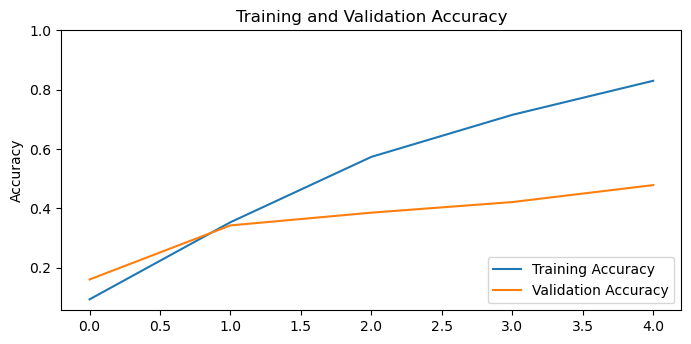

In [ ]:
acc = model_history2.history['accuracy']
val_acc = model_history2.history['val_accuracy']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')


In [ ]:
# Load the pre-trained VGG19 model (excluding the top)
from keras.applications import MobileNetV2,VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create your custom model on top of the base model
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)  # Use the pre-trained base without training
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)  # Add more units based on your requirements
x = Dense(256, activation='relu')(x)  # Add more units based on your requirements
x = Dense(128, activation='relu')(x) 
outputs = Dense(80, activation='softmax')(x)  # Use softmax for multi-class classification

# Create the final model
model_transferLearning2 = tf.keras.Model(inputs=inputs, outputs=outputs)

model_transferLearning2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history2 = model_transferLearning2.fit(train_image, validation_data = val_image, epochs = 5)

Epoch 1/5
 1/70 ━━━━━━━━━━━━━━━━━━━━ 15:15 13s/step - accuracy: 0.0312 - loss: 4.4297

KeyboardInterrupt: 

# Testing Model3 with Custom Data

### Importing custom data and visuzalizing it

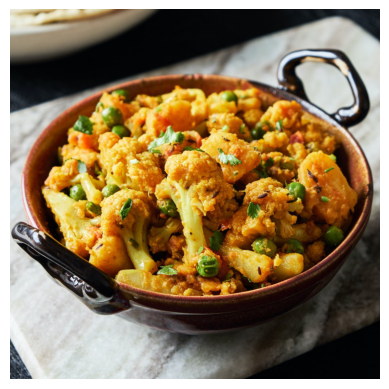

In [ ]:
import matplotlib.image as mpimg
aloogobi = mpimg.imread(r"C:\Users\rohan\Downloads\Test\AlooGobi.jpg")
poha = mpimg.imread(r"C:\Users\rohan\Downloads\Test\poha.jpg")
plt.imshow(aloogobi)
plt.axis(False);

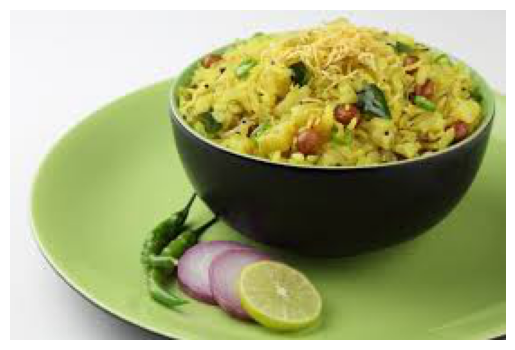

In [ ]:
plt.imshow(poha)
plt.axis(False);

In [ ]:
# Check the shape of our image
aloogobi.shape, poha.shape

((1400, 1400, 3), (183, 275, 3))

Since our model takes in images of shapes `(224, 224, 3)`, we've got to reshape our custom image to use it with our model.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
alooGobi = load_and_prep_image(r"C:\Users\rohan\Downloads\Test\AlooGobi.jpg")
poha = load_and_prep_image(r"C:\Users\rohan\Downloads\Test\poha.jpg")
alooGobi, poha

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[8.99509788e-01, 9.11274493e-01, 8.44607830e-01],
         [9.03431356e-01, 9.07352924e-01, 8.44607830e-01],
         [9.04411793e-01, 9.10784304e-01, 8.24999988e-01],
         ...,
         [7.28553906e-02, 1.04227938e-01, 1.15992650e-01],
         [7.04656839e-02, 1.01838239e-01, 1.13602944e-01],
         [7.05882385e-02, 1.01960786e-01, 1.13725491e-01]],
 
        [[8.90686274e-01, 8.88051450e-01, 8.02144587e-01],
         [8.94607842e-01, 8.86274517e-01, 8.04901958e-01],
         [9.01470602e-01, 8.78799021e-01, 7.77389705e-01],
         ...,
         [5.49632348e-02, 8.63357857e-02, 9.81004909e-02],
         [6.27451017e-02, 9.41176489e-02, 1.05882354e-01],
         [6.66666701e-02, 9.80392173e-02, 1.09803922e-01]],
 
        [[8.77451003e-01, 8.58823538e-01, 7.33823538e-01],
         [8.73958349e-01, 8.54350507e-01, 7.36764729e-01],
         [8.73958349e-01, 8.49571049e-01, 7.07965672e-01],
         ...,
         [7

In [ ]:
# # Make a prediction on custom image tensor
# pred = model_transferLearning.predict(alooGobi)  (Dimensions Mismatch)
# pred  

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {alooGobi.shape},{poha.shape}")
alooGobi = tf.expand_dims(alooGobi, axis=0) # add an extra dimension at axis 0
poha = tf.expand_dims(poha, axis=0) # add an extra dimension at axis 0
print(f"Shape after new dimension: {alooGobi.shape},{poha.shape}")
alooGobi

Shape before new dimension: (224, 224, 3),(224, 224, 3)
Shape after new dimension: (1, 224, 224, 3),(1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[8.99509788e-01, 9.11274493e-01, 8.44607830e-01],
         [9.03431356e-01, 9.07352924e-01, 8.44607830e-01],
         [9.04411793e-01, 9.10784304e-01, 8.24999988e-01],
         ...,
         [7.28553906e-02, 1.04227938e-01, 1.15992650e-01],
         [7.04656839e-02, 1.01838239e-01, 1.13602944e-01],
         [7.05882385e-02, 1.01960786e-01, 1.13725491e-01]],

        [[8.90686274e-01, 8.88051450e-01, 8.02144587e-01],
         [8.94607842e-01, 8.86274517e-01, 8.04901958e-01],
         [9.01470602e-01, 8.78799021e-01, 7.77389705e-01],
         ...,
         [5.49632348e-02, 8.63357857e-02, 9.81004909e-02],
         [6.27451017e-02, 9.41176489e-02, 1.05882354e-01],
         [6.66666701e-02, 9.80392173e-02, 1.09803922e-01]],

        [[8.77451003e-01, 8.58823538e-01, 7.33823538e-01],
         [8.73958349e-01, 8.54350507e-01, 7.36764729e-01],
         [8.73958349e-01, 8.49571049e-01, 7.07965672e-01],
         ...,
         [7

In [ ]:
# Make a prediction on custom image tensor
pred = model_transferLearning.predict(alooGobi)
pred, np.max(pred),np.argmax(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(array([[1.77690526e-05, 2.89629161e-01, 2.02468514e-01, 5.11573022e-03,
         9.58706290e-02, 6.74908422e-03, 1.38258883e-05, 3.45386070e-05,
         1.30088365e-05, 1.22260208e-05, 1.33052090e-05, 2.19395198e-03,
         3.06063448e-03, 1.59070790e-02, 1.14189852e-02, 1.33398236e-04,
         5.82500707e-06, 2.86322031e-02, 1.29889395e-05, 5.02236246e-04,
         9.68968816e-05, 5.77394105e-03, 1.47389667e-02, 2.92754237e-04,
         8.49014668e-06, 5.53907012e-05, 4.32271081e-05, 1.56678972e-04,
         1.38262840e-05, 4.03584909e-06, 7.53931294e-04, 1.40347993e-02,
         1.27915516e-02, 5.40882000e-04, 1.13468050e-04, 4.04841558e-06,
         1.00533645e-04, 4.60771756e-04, 1.86336940e-04, 1.23410888e-01,
         4.73287748e-03, 8.14038401e-07, 7.00948294e-05, 3.71021611e-06,
         1.17622428e-02, 3.27660033e-04, 1.01623111e-04, 1.98463113e-06,
         4.67446125e-06, 1.79342940e-04, 1.22678339e-05, 4.09575691e-03,
         3.49787638e-06, 7.15672621e-04, 4.41550801

In [ ]:
pred2 = model_transferLearning.predict(poha)
pred2, np.max(pred2),np.argmax(pred2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


(array([[3.4426448e-05, 1.1123485e-03, 1.0602152e-02, 3.2566932e-03,
         3.3163071e-02, 2.5376240e-03, 2.2762846e-05, 5.2320229e-07,
         4.5915990e-06, 3.6406526e-04, 4.7299522e-04, 3.5966322e-04,
         2.5931185e-02, 2.0155327e-05, 1.8822213e-03, 1.3165381e-03,
         3.1242882e-05, 2.2220222e-05, 3.8490068e-02, 5.0415569e-03,
         1.2262751e-02, 2.7658318e-03, 1.3485951e-02, 6.3770247e-05,
         1.1018165e-04, 7.5504561e-03, 2.5021695e-04, 2.3709716e-05,
         4.5319116e-06, 2.6989137e-04, 3.4818158e-04, 3.7535370e-04,
         7.3270667e-06, 2.3783150e-04, 2.3414457e-05, 7.7080549e-06,
         1.9321167e-04, 1.2233281e-03, 6.3052047e-03, 1.6465004e-03,
         4.0391263e-02, 2.8318127e-07, 1.3227051e-05, 2.3144137e-03,
         1.0702139e-02, 1.5141371e-04, 2.4143830e-03, 2.0009988e-04,
         2.2408200e-08, 1.9927891e-03, 7.3624537e-06, 1.2209472e-04,
         1.8642220e-03, 1.3559705e-03, 7.5272005e-04, 3.4334542e-05,
         1.3379642e-04, 2.5218869e

In [ ]:
class_names=df.Label.unique()
class_names, len(class_names)

(array(['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi',
        'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu',
        'bandar_laddu', 'basundi', 'bhatura', 'bhindi_masala', 'biryani',
        'boondi', 'butter_chicken', 'chak_hao_kheer', 'cham_cham',
        'chana_masala', 'chapati', 'chhena_kheeri', 'chicken_razala',
        'chicken_tikka', 'chicken_tikka_masala', 'chikki',
        'daal_baati_churma', 'daal_puri', 'dal_makhani', 'dal_tadka',
        'dharwad_pedha', 'doodhpak', 'double_ka_meetha', 'dum_aloo',
        'gajar_ka_halwa', 'gavvalu', 'ghevar', 'gulab_jamun', 'imarti',
        'jalebi', 'kachori', 'kadai_paneer', 'kadhi_pakoda', 'kajjikaya',
        'kakinada_khaja', 'kalakand', 'karela_bharta', 'kofta',
        'kuzhi_paniyaram', 'lassi', 'ledikeni', 'litti_chokha', 'lyangcha',
        'maach_jhol', 'makki_di_roti_sarson_da_saag', 'malapua',
        'misi_roti', 'misti_doi', 'modak', 'mysore_pak', 'naan',
        'navrattan_korma', 'palak_paneer', 'panee

In [ ]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[np.argmax(pred)]
pred_class

'aloo_gobi'

In [ ]:
pred_class = class_names[np.argmax(pred2)]
pred_class

'poha'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[np.argmax(pred)]
    
  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


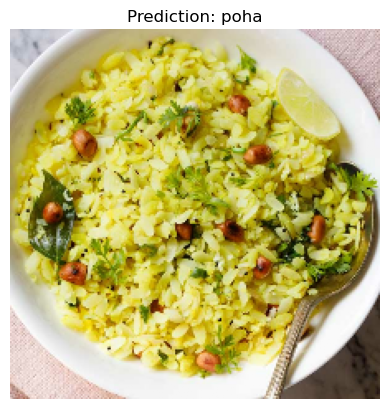

In [ ]:
# Test our model on a custom image
pred_and_plot(model_transferLearning, r"C:\Users\rohan\Downloads\Test\poha3.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


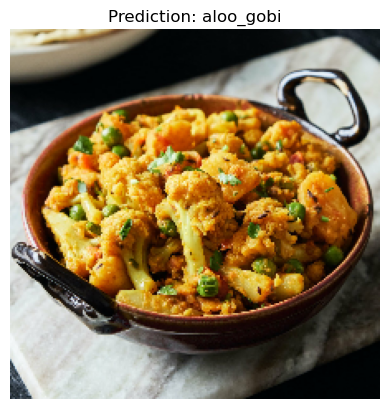

In [ ]:
# Test our model on a custom image
pred_and_plot(model_transferLearning, r"C:\Users\rohan\Downloads\Test\AlooGobi.jpg", class_names)

### Making predictions with our trained model
To evaluate our trained model, we need to make some predictions with it and then compare those predictions to the test dataset.

Because the model has never seen the test dataset, this should give us an indication of how the model will perform in the real world on data similar to what it has been trained on.

To make predictions with our trained model, we can use the `predict()` method passing it the test data.

Since our data is multi-class, doing this will return a prediction probably tensor for each sample.

In other words, every time the trained model see's an image it will compare it to all of the patterns it learned during training and return an output for every cla80(all 101 of them) of how likely the image is to be that class.

In [ ]:
# Make predictions with model
pred_probs = model_transferLearning.predict(test_image, verbose=1) # set verbosity to see how long it will take 

38/38 ━━━━━━━━━━━━━━━━━━━━ 18s 423ms/step


In [ ]:
# How many predictions are there?
len(pred_probs)

1200

In [ ]:
# What's the shape of our predictions?
pred_probs.shape

(1200, 80)

In [ ]:
# How do they look?
pred_probs[:10]

array([[1.54913520e-03, 7.05391495e-03, 2.73207901e-03, 2.85564102e-02,
        6.05564518e-03, 4.53250017e-03, 3.23633401e-04, 3.76568205e-04,
        4.64748562e-04, 5.06258630e-06, 2.18307050e-05, 6.18167877e-01,
        4.22326196e-03, 2.73279846e-04, 2.81722681e-03, 9.10013390e-04,
        3.12261204e-06, 3.26071121e-03, 2.96866870e-04, 9.10156887e-05,
        8.68826546e-03, 7.38899224e-03, 1.02805952e-02, 1.53420842e-04,
        2.61679932e-04, 7.08704581e-03, 3.07727326e-03, 1.43526282e-04,
        4.47129318e-03, 5.54669441e-06, 8.73976096e-04, 4.72055096e-03,
        3.15790996e-03, 2.51621299e-04, 2.78684565e-05, 3.31461852e-05,
        1.12080306e-05, 5.26349868e-06, 4.60450677e-03, 1.55009245e-02,
        6.01097825e-04, 6.99278235e-06, 1.57933791e-05, 3.82294820e-05,
        1.26622409e-01, 3.27509977e-02, 6.19484228e-04, 2.60976030e-05,
        6.13563452e-06, 1.88164203e-03, 4.44782518e-06, 2.84165377e-03,
        7.19796075e-03, 3.03213252e-04, 1.29193440e-03, 1.600394

In [ ]:
# We get one prediction probability per class
print(f"Number of prediction probabilities for sample 0: {len(pred_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {pred_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {pred_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 80
What prediction probability sample 0 looks like:
 [1.5491352e-03 7.0539149e-03 2.7320790e-03 2.8556410e-02 6.0556452e-03
 4.5325002e-03 3.2363340e-04 3.7656820e-04 4.6474856e-04 5.0625863e-06
 2.1830705e-05 6.1816788e-01 4.2232620e-03 2.7327985e-04 2.8172268e-03
 9.1001339e-04 3.1226120e-06 3.2607112e-03 2.9686687e-04 9.1015689e-05
 8.6882655e-03 7.3889922e-03 1.0280595e-02 1.5342084e-04 2.6167993e-04
 7.0870458e-03 3.0772733e-03 1.4352628e-04 4.4712932e-03 5.5466944e-06
 8.7397610e-04 4.7205510e-03 3.1579100e-03 2.5162130e-04 2.7868457e-05
 3.3146185e-05 1.1208031e-05 5.2634987e-06 4.6045068e-03 1.5500925e-02
 6.0109782e-04 6.9927823e-06 1.5793379e-05 3.8229482e-05 1.2662241e-01
 3.2750998e-02 6.1948423e-04 2.6097603e-05 6.1356345e-06 1.8816420e-03
 4.4478252e-06 2.8416538e-03 7.1979607e-03 3.0321325e-04 1.2919344e-03
 1.6003947e-05 8.3949511e-05 6.2302082e-05 1.7811002e-06 6.1868801e-04
 6.2884413e-02 6.5395195e-04 9.6236392e-05 9.3

it outputs a prediction probability between 0 and 1 for all each of the 80 classes.

And the index of the highest prediction probability can be considered what the model thinks is the most likely label. Similarly, the lower prediction probaiblity value, the less the model thinks that the target image is that specific class.

> 🔑 **Note:** Due to the nature of the softmax activation function, the sum of each of the prediction probabilities for a single sample will be 1 (or at least very close to 1). E.g. `pred_probs[0].sum() = 1`.

We can find the index of the maximum value in each prediction probability tensor using the `argmax()` method.

# Evaluating our models predictions

In [ ]:
# Get the class predicitons of each label
pred_classes = pred_probs.argmax(axis=1)

# How do they look?
pred_classes[:10]

array([11, 18, 10, 78,  2,  2, 35,  4,  3, 53], dtype=int64)

In [ ]:
# Saving test data label values to y_labels 
test_df.Label_encoded.values
y_labels=test_df.Label_encoded.values
y_labels

array([11, 69, 10, ..., 32, 10, 76])

In [ ]:
# Get accuracy score by comparing predicted classes to ground truth labels
from sklearn.metrics import accuracy_score
sklearn_accuracy = accuracy_score(y_labels, pred_classes)
print(f'Accuracy of TransferLearned Model on the Indian Food dataset with 80 food items: {sklearn_accuracy}')

Accuracy of TransferLearned Model on the Indian Food dataset with 80 food items: 0.4191666666666667


### Precision, Recall and F1-Scores

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        19
           1       0.33      0.06      0.10        17
           2       0.17      0.70      0.28        10
           3       0.53      0.41      0.46        22
           4       0.45      0.25      0.32        20
           5       0.41      0.35      0.38        20
           6       0.36      0.57      0.44        14
           7       0.40      0.17      0.24        12
           8       0.72      0.68      0.70        19
           9       0.26      0.57      0.36        14
          10       0.60      0.19      0.29        16
          11       0.83      0.26      0.40        19
          12       0.55      0.60      0.57        10
          13       0.73      0.62      0.67        13
          14       0.29      0.33      0.31        15
          15       0.50      0.53      0.52        15
          16       0.50      0.28      0.36        18
          17       0.00    

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix with 80 Food Lables

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes is not None and len(classes) > 0:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

In [ ]:
# Checking class names, y_labels and pred_classes values
class_names[:10], y_labels[:10], pred_classes[:10]

(array(['adhirasam', 'aloo_gobi', 'aloo_matar', 'aloo_methi',
        'aloo_shimla_mirch', 'aloo_tikki', 'anarsa', 'ariselu',
        'bandar_laddu', 'basundi'], dtype=object),
 array([11, 69, 10, 78, 59,  1, 35,  4,  3, 16]),
 array([11, 18, 10, 78,  2,  2, 35,  4,  3, 53], dtype=int64))

In [ ]:
# Plot a confusion matrix with all 25250 predictions, ground truth labels and 80 classes
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20,
                      norm=False,
                      savefig=True)

In [ ]:
# Get a dictionary of the classification report
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rohan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0': {'precision': 0.45454545454545453,
  'recall': 0.5263157894736842,
  'f1-score': 0.4878048780487805,
  'support': 19},
 '1': {'precision': 0.3333333333333333,
  'recall': 0.058823529411764705,
  'f1-score': 0.1,
  'support': 17},
 '2': {'precision': 0.175,
  'recall': 0.7,
  'f1-score': 0.27999999999999997,
  'support': 10},
 '3': {'precision': 0.5294117647058824,
  'recall': 0.4090909090909091,
  'f1-score': 0.46153846153846156,
  'support': 22},
 '4': {'precision': 0.45454545454545453,
  'recall': 0.25,
  'f1-score': 0.3225806451612903,
  'support': 20},
 '5': {'precision': 0.4117647058823529,
  'recall': 0.35,
  'f1-score': 0.37837837837837834,
  'support': 20},
 '6': {'precision': 0.36363636363636365,
  'recall': 0.5714285714285714,
  'f1-score': 0.4444444444444444,
  'support': 14},
 '7': {'precision': 0.4,
  'recall': 0.16666666666666666,
  'f1-score': 0.23529411764705882,
  'support': 12},
 '8': {'precision': 0.7222222222222222,
  'recall': 0.6842105263157895,
  'f1-score'

Since the f1-score combines precision and recall in one metric, let's focus on that.

To extract it, we'll create an empty dictionary called `class_f1_scores` and then loop through each item in `classification_report_dict`, appending the class name and f1-score as the key, value pairs in `class_f1_scores`.

In [ ]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'adhirasam': 0.4878048780487805,
 'aloo_gobi': 0.1,
 'aloo_matar': 0.27999999999999997,
 'aloo_methi': 0.46153846153846156,
 'aloo_shimla_mirch': 0.3225806451612903,
 'aloo_tikki': 0.37837837837837834,
 'anarsa': 0.4444444444444444,
 'ariselu': 0.23529411764705882,
 'bandar_laddu': 0.7027027027027027,
 'basundi': 0.35555555555555557,
 'bhatura': 0.2857142857142857,
 'bhindi_masala': 0.39999999999999997,
 'biryani': 0.5714285714285713,
 'boondi': 0.6666666666666667,
 'butter_chicken': 0.3125,
 'chak_hao_kheer': 0.5161290322580646,
 'cham_cham': 0.35714285714285715,
 'chana_masala': 0.0,
 'chapati': 0.4705882352941177,
 'chhena_kheeri': 0.0,
 'chicken_razala': 0.5384615384615384,
 'chicken_tikka': 0.2857142857142857,
 'chicken_tikka_masala': 0.29411764705882354,
 'chikki': 0.7096774193548386,
 'daal_baati_churma': 0.1,
 'daal_puri': 0.3636363636363636,
 'dal_makhani': 0.6956521739130435,
 'dal_tadka': 0.25,
 'dharwad_pedha': 0.5853658536585366,
 'doodhpak': 0.38095238095238093,
 'double

In [ ]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

class_name  f1-score
58                          naan  0.941176
47                         lassi  0.903226
37                        jalebi  0.833333
42                kakinada_khaja  0.769231
52  makki_di_roti_sarson_da_saag  0.769231

# Visualizing F1 score of each Food Item in Test Data

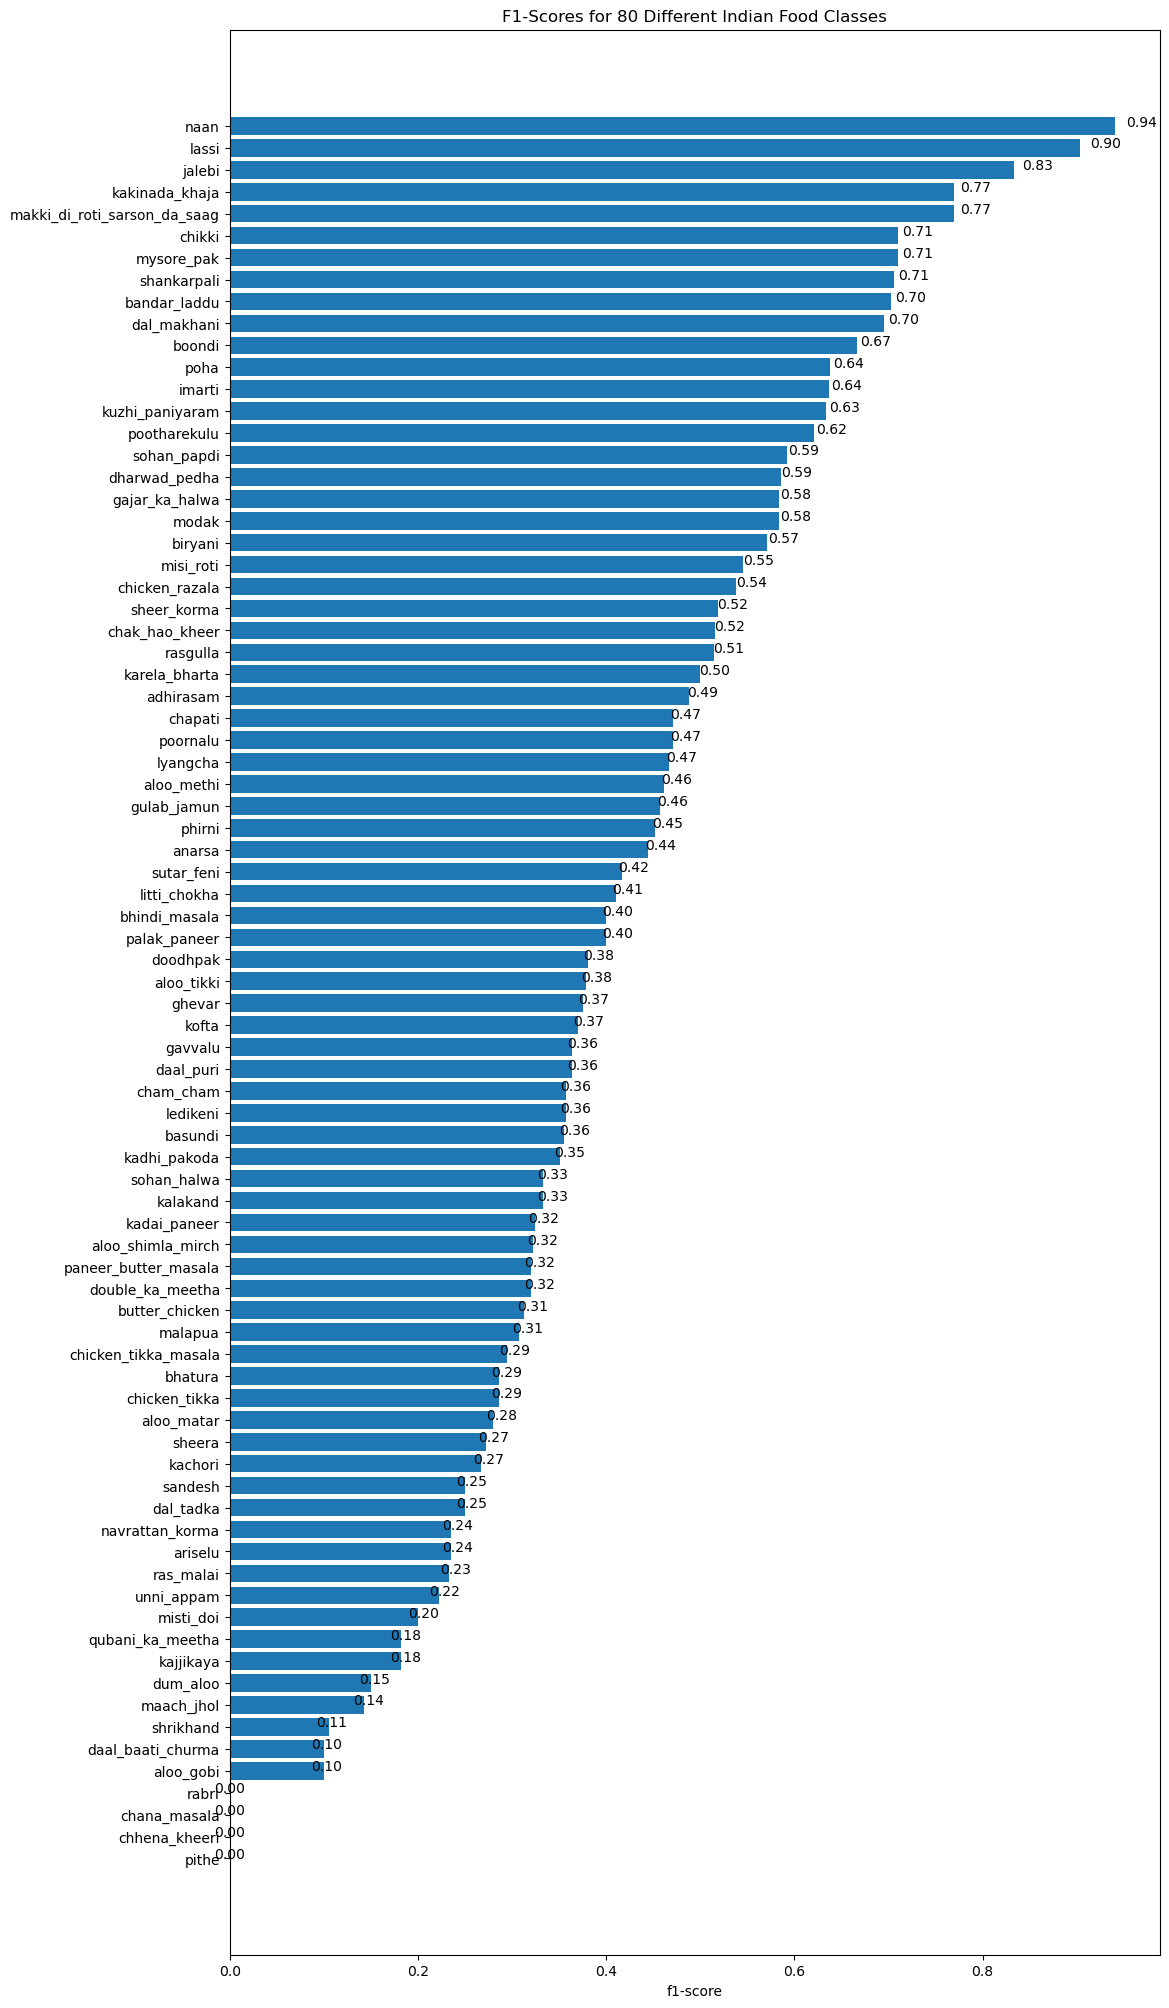

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 80 Different Indian Food Classes")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)